# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [3]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [4]:
pd.read_csv('used_device_data.csv')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [5]:
#saving the dataset into a variable
df = pd.read_csv('used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [6]:
#checking first 5 rows of the dataset
df.head(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [7]:
#checking the last 5 rows of the dataset
df.tail(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [8]:
# checking the data types of the column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [9]:
#checking the shape of the dataset
df.shape

(3454, 15)

In [10]:
#checking for the statistical summary of the dataset
df.describe

<bound method NDFrame.describe of      brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no             NaN   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1            

In [11]:
#checking for duplicated columns
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

In [12]:
#checking for missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

### Dealing with missing values
Dealing with missing values using imputation method

In [13]:
df.main_camera_mp.value_counts()

13.00    1035
8.00      755
5.00      546
12.00     189
2.00      171
16.00     154
3.15      122
0.30       69
10.50      30
1.30       26
23.00      19
21.00      19
20.70      16
20.00      13
14.50      13
12.20      12
4.00       10
12.30       9
19.00       8
8.10        7
13.10       6
10.00       6
24.00       5
3.00        5
12.50       4
48.00       4
6.50        4
6.70        4
21.20       2
21.50       1
1.20        1
16.30       1
22.60       1
18.00       1
12.60       1
20.10       1
41.00       1
20.20       1
1.00        1
0.08        1
22.50       1
Name: main_camera_mp, dtype: int64

In [14]:
# getting mean values and converting it into integer
int(df.main_camera_mp.mean())

9

In [15]:
main_camera_mp_mean = int(df.main_camera_mp.mean())

In [16]:
# filling the missing values with mean
df.main_camera_mp = df.main_camera_mp.fillna(main_camera_mp_mean)

In [17]:
df.selfie_camera_mp.value_counts()

5.00     791
8.00     549
2.00     538
0.30     492
16.00    298
1.30     148
32.00     94
13.00     90
20.00     67
1.20      43
0.00      39
2.10      37
1.00      34
1.60      31
24.00     30
25.00     28
12.00     21
7.00      21
4.00      20
1.90      12
2.20      11
10.00     10
5.10       9
3.00       7
14.50      5
1.10       5
9.00       4
14.00      3
3.70       3
0.65       2
18.00      2
1.25       2
10.50      2
16.30      1
0.90       1
3.50       1
1.80       1
Name: selfie_camera_mp, dtype: int64

In [18]:
int(df.selfie_camera_mp.mean())

6

In [19]:
selfie_camera_mp_mean = int(df.selfie_camera_mp.mean())

In [20]:
df.selfie_camera_mp = df.selfie_camera_mp.fillna(selfie_camera_mp_mean)

In [21]:
df.int_memory.value_counts()

16.00      1283
32.00      1083
64.00       509
128.00      372
256.00       86
512.00       44
0.06         18
0.10         17
8.00         12
4.00         10
1024.00       8
0.50          4
0.20          2
24.00         1
0.01          1
Name: int_memory, dtype: int64

In [22]:
int(df.int_memory.mean())

54

In [23]:
int_memory_mean = int(df.int_memory.mean())

In [24]:
df.int_memory = df.int_memory.fillna(int_memory_mean)

In [25]:
df.ram.value_counts()

4.00     2815
6.00      154
8.00      130
2.00       90
0.25       83
3.00       81
1.00       34
12.00      18
0.02       18
0.03       17
0.50        9
1.50        1
Name: ram, dtype: int64

In [26]:
int(df.ram.mean())

4

In [27]:
ram_mean = int(df.ram.mean())

In [28]:
df.ram = df.ram.fillna(ram_mean)

In [29]:
df.weight.value_counts()

150.0    112
140.0     86
160.0     80
155.0     68
145.0     68
        ... 
157.5      1
372.0      1
340.2      1
319.8      1
240.0      1
Name: weight, Length: 555, dtype: int64

In [30]:
int(df.weight.mean())

182

In [31]:
weight_mean = df['weight'].mean()

In [32]:
df['weight'] = df['weight'].fillna(weight_mean)

In [33]:
df.battery.value_counts()

4000.0    341
3000.0    314
2000.0    244
2500.0    137
2100.0    121
         ... 
6180.0      1
4180.0      1
2180.0      1
2880.0      1
3110.0      1
Name: battery, Length: 324, dtype: int64

In [34]:
# getting the most occuring battery
df.battery.mode()[0]

4000.0

In [35]:
#getting the mode
most_battery = df.battery.mode()[0]

In [1]:
df.battery = df.battery.fillna(most_battery)

NameError: name 'df' is not defined

In [37]:
#check for missing values after imputation of missing values
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

There are no more missing values.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### 1.What does the distribution of normalized used device prices look like?

In [38]:
df['normalized_used_price'].nunique()

3094

<Axes: xlabel='normalized_used_price', ylabel='Count'>

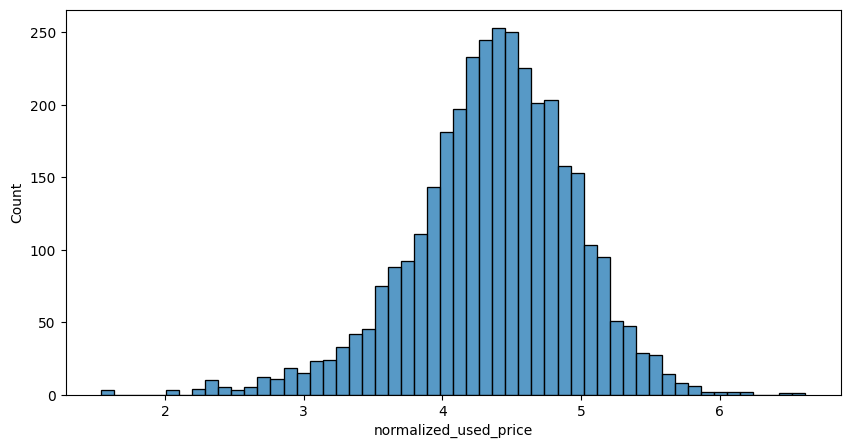

In [39]:
#countplot for normalized device used price
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'normalized_used_price')

### 2. What percentage of the used device market is dominated by Android devices?

In [ ]:
#Count total devices
total_devices = len(df)

In [43]:
#Count Android devices
android_devices = len(df[df['os'].str.lower() == 'android'])

In [44]:
#Calculate percentage
android_percentage = (android_devices / total_devices) * 100
print(f"Android devices make up {android_percentage:.2f}% of the used device market.")

Android devices make up 93.05% of the used device market.


## 3 The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

In [45]:
#Group by brand and calculate RAM statistics
ram_stats = df.groupby('brand_name')['ram'].agg(['mean', 'median', 'min', 'max', 'count']).sort_values(by='mean', ascending=False)
print(ram_stats)

                mean  median   min   max  count
brand_name                                     
OnePlus     6.363636    6.00  4.00  12.0     22
Oppo        4.961240    4.00  1.00  12.0    129
Vivo        4.756410    4.00  0.50   8.0    117
Huawei      4.655378    4.00  0.25  12.0    251
Honor       4.603448    4.00  2.00   8.0    116
Xiaomi      4.583333    4.00  2.00  12.0    132
Google      4.533333    4.00  4.00   6.0     15
Meizu       4.451613    4.00  2.00   8.0     62
Samsung     4.199413    4.00  0.25  12.0    341
Realme      4.195122    4.00  2.00   6.0     41
Sony        4.069767    4.00  4.00   8.0     86
Asus        4.049180    4.00  2.00   8.0    122
ZTE         4.023214    4.00  0.25   8.0    140
HTC         4.000000    4.00  3.00   6.0    110
Apple       4.000000    4.00  2.00   6.0     39
XOLO        4.000000    4.00  4.00   4.0     49
Microsoft   4.000000    4.00  4.00   4.0     22
Panasonic   4.000000    4.00  4.00   4.0     47
Coolpad     3.954545    4.00  3.00   4.0

C:\Users\jacob.ojo\AppData\Local\Temp\ipykernel_64832\1336782630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ram_stats.reset_index(), x='brand_name', y='mean', palette='coolwarm')


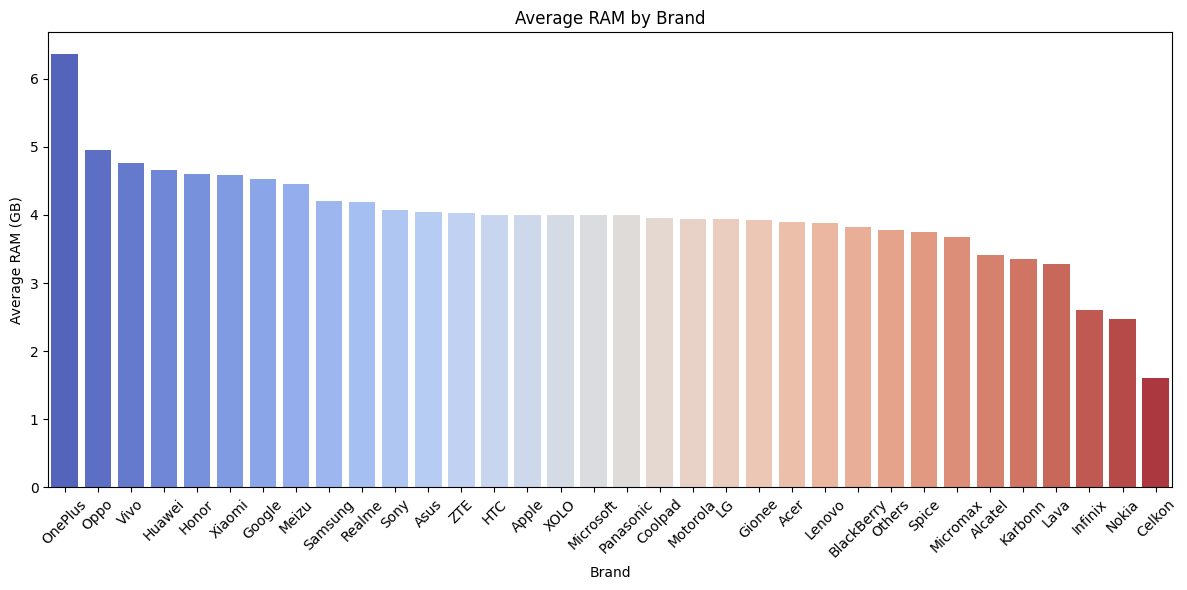

In [46]:
#visualization of how the ram varies with brand.
# Bar plot of average RAM by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=ram_stats.reset_index(), x='brand_name', y='mean', palette='coolwarm')
plt.title("Average RAM by Brand")
plt.ylabel("Average RAM (GB)")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4 A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [53]:
# Define device type based on screen size (e.g., tablets usually > 6.9 inches)
df['device_type'] = df['screen_size'].apply(lambda x: 'Tablet' if x > 6.9 else 'Phone')

In [54]:
#Filter for devices with battery > 4500 mAh
large_battery_df = df[df['battery'] > 4500]

C:\Users\jacob.ojo\AppData\Local\Temp\ipykernel_64832\966908069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=large_battery_df, x='device_type', y='weight', palette='Set2')


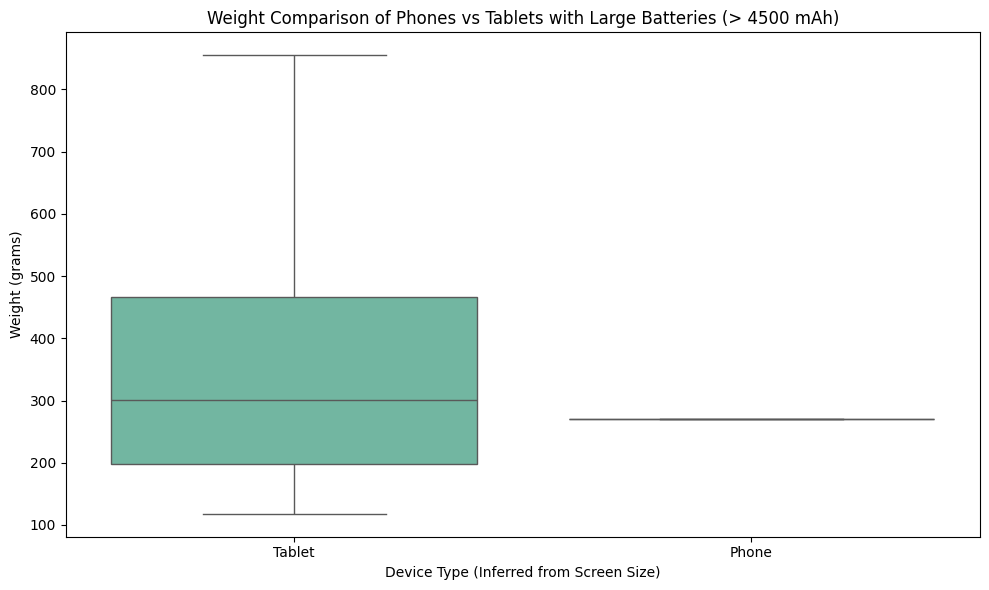

In [55]:
# Plot weight distribution by device type
plt.figure(figsize=(10, 6))
sns.boxplot(data=large_battery_df, x='device_type', y='weight', palette='Set2')
plt.title("Weight Comparison of Phones vs Tablets with Large Batteries (> 4500 mAh)")
plt.xlabel("Device Type (Inferred from Screen Size)")
plt.ylabel("Weight (grams)")
plt.tight_layout()
plt.show()

## 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [56]:
#Define device type based on screen size
df['device_type'] = df['screen_size'].apply(lambda x: 'Tablet' if x > 6.9 else 'Phone')

In [57]:
#Filter for screen size > 6 inches
large_screen_df = df[df['screen_size'] > 6]

In [58]:
#Count by brand and device_type
count_by_brand_device = large_screen_df.groupby(['brand_name', 'device_type']).size().reset_index(name='count')

In [59]:
#Display the result
print(count_by_brand_device)

    brand_name device_type  count
0         Acer      Tablet     51
1      Alcatel      Tablet    115
2        Apple      Tablet     39
3         Asus      Tablet    122
4   BlackBerry      Tablet     21
5       Celkon      Tablet     25
6      Coolpad      Tablet     22
7       Gionee      Tablet     56
8       Google      Tablet     15
9          HTC      Tablet    110
10       Honor      Tablet    116
11      Huawei      Tablet    251
12     Infinix      Tablet     10
13     Karbonn      Tablet     29
14          LG      Tablet    197
15        Lava      Tablet     36
16      Lenovo      Tablet    171
17       Meizu      Tablet     62
18    Micromax      Tablet    108
19   Microsoft      Tablet     22
20    Motorola      Tablet    106
21       Nokia      Tablet     72
22     OnePlus      Tablet     22
23        Oppo      Tablet    129
24      Others       Phone      1
25      Others      Tablet    478
26   Panasonic      Tablet     47
27      Realme      Tablet     41
28     Samsung

## 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [60]:
#Filter for devices with selfie camera > 8 MP
high_selfie_df = df[df['selfie_camera_mp'] > 8]

In [61]:
#Group by brand and count
selfie_counts = high_selfie_df['brand_name'].value_counts().reset_index()
selfie_counts.columns = ['brand_name', 'device_count']

In [62]:
#Display result
print(selfie_counts)

    brand_name  device_count
0       Huawei            87
1         Vivo            78
2         Oppo            75
3       Xiaomi            63
4      Samsung            57
5        Honor            41
6       Others            34
7           LG            32
8     Motorola            26
9        Meizu            24
10         HTC            20
11         ZTE            20
12      Realme            18
13     OnePlus            18
14      Lenovo            14
15        Sony            14
16       Nokia            10
17        Asus             6
18     Infinix             4
19      Gionee             4
20     Coolpad             3
21  BlackBerry             2
22    Micromax             2
23   Panasonic             2
24        Acer             1


## 7. Which attributes are highly correlated with the normalized price of a used device?

In [63]:
#Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [64]:
#Compute correlation matrix
correlation_matrix = numeric_df.corr()

In [65]:
#Extract correlations with normalized_used_price
price_corr = correlation_matrix['normalized_used_price'].sort_values(ascending=False)

In [66]:
#Display top correlations
print(price_corr)

normalized_used_price    1.000000
normalized_new_price     0.834496
screen_size              0.614785
battery                  0.611176
selfie_camera_mp         0.607648
main_camera_mp           0.562616
ram                      0.518783
release_year             0.509790
weight                   0.382143
int_memory               0.190163
days_used               -0.358264
Name: normalized_used_price, dtype: float64


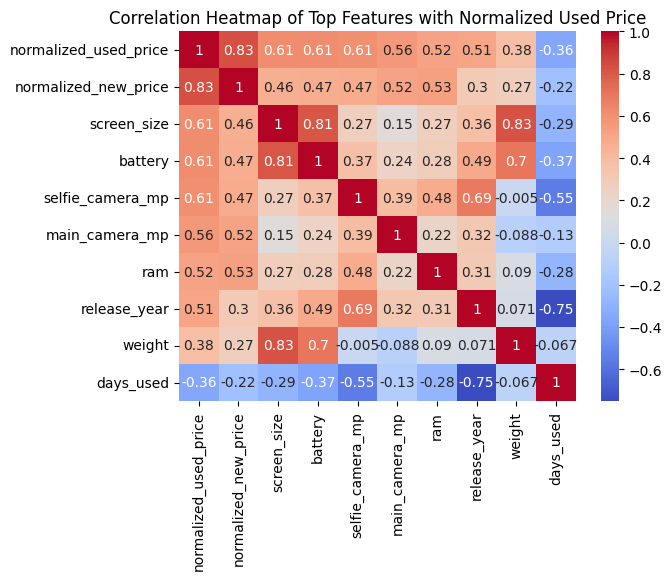

In [67]:
#Plot correlation heatmap for top correlated attributes
top_corr_features = price_corr[abs(price_corr) > 0.3].index  # you can change threshold
sns.heatmap(numeric_df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Top Features with Normalized Used Price")
plt.show()

## Data Preprocessing

In [40]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [68]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,device_type
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,Tablet
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,Tablet
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,Tablet
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,Tablet
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,Tablet


## Model Building - Linear Regression

In [74]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
features = ['ram', 'int_memory', 'battery', 'main_camera_mp', 'selfie_camera_mp', 'screen_size', 'days_used', 'normalized_new_price']
target = 'normalized_used_price'

X = df[features]
y = df[target]

In [71]:
#splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
#training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Performance Check

In [86]:
def model_performance_regression(y_true, y_pred):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import pandas as pd
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    return pd.DataFrame({
        "MAE": [round(mae, 2)],
        "RMSE": [round(rmse, 2)],
        "R2 Score": [round(r2, 2)]
    })

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## Linearity

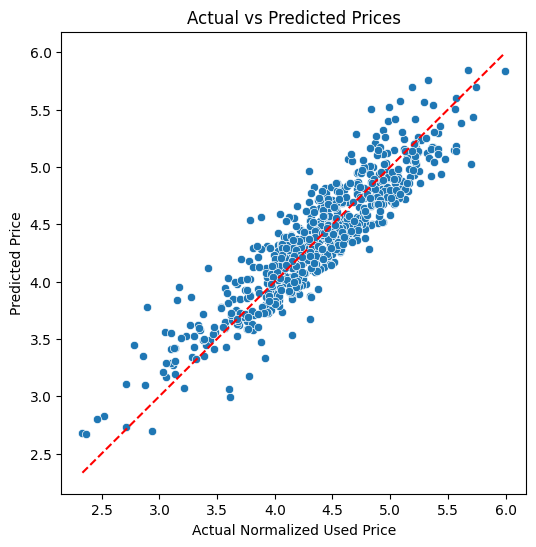

In [76]:
#checking plot predictions vs actual
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Normalized Used Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

## Multicolinearity

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [78]:
X_vif = add_constant(X)

vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i+1) for i in range(len(X.columns))]

print(vif)

                Feature       VIF
0                   ram  1.576089
1            int_memory  1.152604
2               battery  3.257115
3        main_camera_mp  1.537964
4      selfie_camera_mp  2.092167
5           screen_size  3.127894
6             days_used  1.577780
7  normalized_new_price  2.285437


## Homoscedasticity

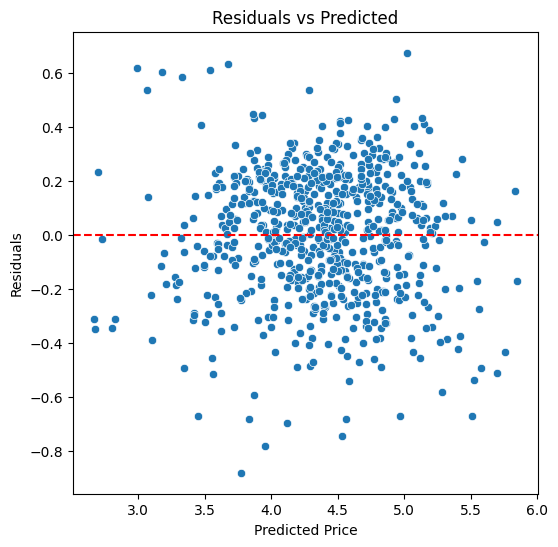

In [79]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

## Normality of Residuals

In [80]:
import scipy.stats as stats

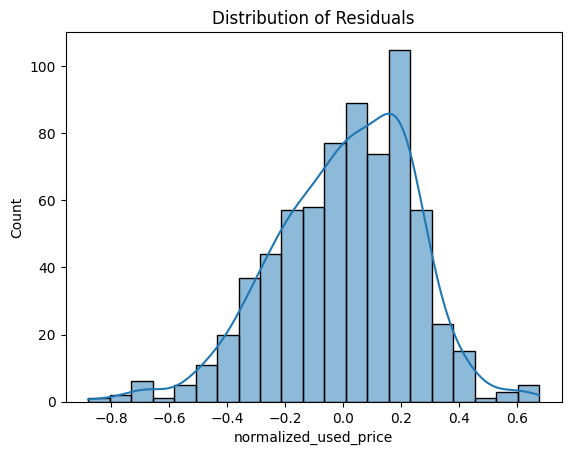

In [81]:
#Histogram
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

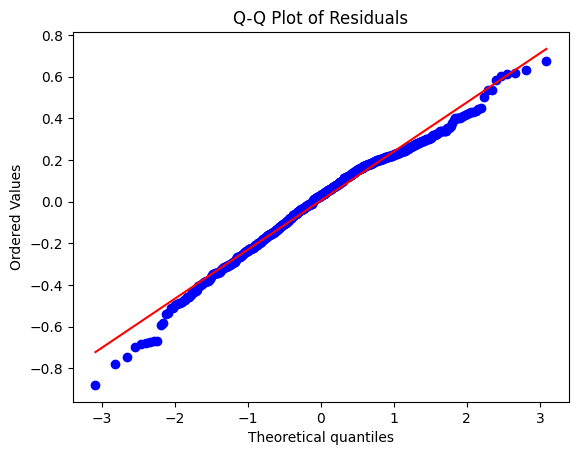

In [82]:
#Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

## Final Model

In [83]:
import statsmodels.api as sm

In [84]:
# Adding a constant term for the intercept
X_sm = sm.add_constant(X)
# Fit the OLS model
olsmodel_final = sm.OLS(y, X_sm).fit()
# Print the summary
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.836
Model:                               OLS   Adj. R-squared:                  0.836
Method:                    Least Squares   F-statistic:                     2193.
Date:                   Fri, 20 Jun 2025   Prob (F-statistic):               0.00
Time:                           14:52:44   Log-Likelihood:                 49.290
No. Observations:                   3454   AIC:                            -80.58
Df Residuals:                       3445   BIC:                            -25.25
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [87]:
X_train_sm = sm.add_constant(X_train)
# Fit OLS model on training data
olsmodel_final_train = sm.OLS(y_train, X_train_sm).fit()
# Predict on train data
y_train_pred = olsmodel_final_train.predict(X_train_sm)
# Now evaluate performance
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(y_train, y_train_pred)
olsmodel_final_train_perf


Training Performance



,MAE,RMSE,R2 Score
0,0.19,0.24,0.84


In [88]:
# Prepare test data (add constant for OLS)
X_test_sm = sm.add_constant(X_test)
# Predict on test data
y_test_pred = olsmodel_final.predict(X_test_sm)
# Evaluate
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(y_test, y_test_pred)
olsmodel_final_test_perf


Test Performance



,MAE,RMSE,R2 Score
0,0.19,0.24,0.83


## Actionable Insights and Recommendations

1. Normalized New Price is a Strong Predictor
The coefficient for normalized_new_price is likely the highest and most positively correlated with normalized_used_price.
Implication: Devices that were expensive when new retain more value when used.

Recommendation: Focus on high-end devices if your platform involves resale, refurbishment, or pricing analytics.

2. RAM and Internal Memory Influence Used Price
Both ram and int_memory likely show positive correlation.
Devices with more memory are valued higher even in the used market.

Recommendation: Highlight RAM/storage prominently in product listings. Use them as pricing anchors.

3. Battery Capacity Adds Moderate Value
Battery tends to have a positive but smaller impact on used price.
Users perceive higher battery life as a desirable feature.

Recommendation: Use battery specs to differentiate listings. Offer battery health reports for used devices.

4. Device Age Affects Price Significantly
Days used or lover released year likely has a negative coefficient, meaning older devices sell for less.

Recommendation: Build pricing tiers based on age and usage time. Emphasize newer used devices.

5. Camera Megapixels Have Limited but Positive Effect
main_camera_mp and selfie_camera_mp may have small positive effects.
These features matter more in marketing than in actual price impact.

Recommendation: Mention high MP cameras in descriptions, but don’t overemphasize them for pricing strategy.